### ACO

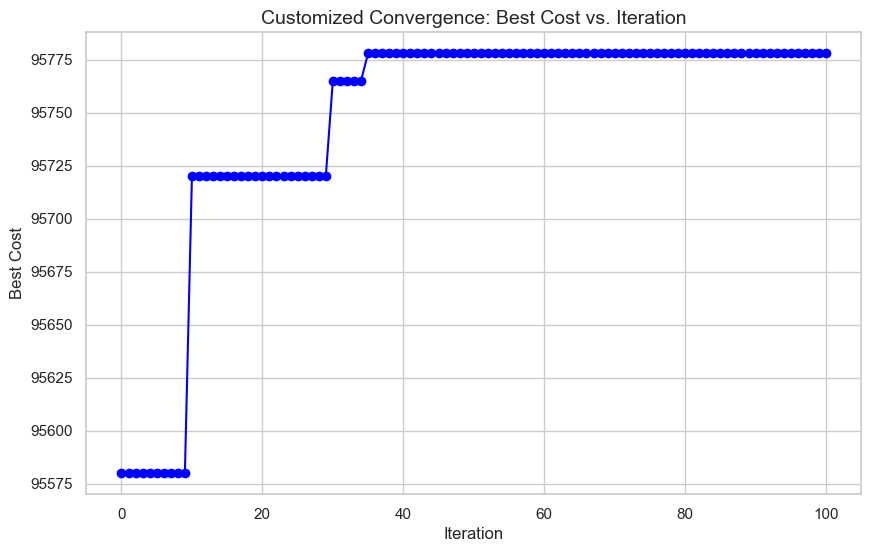

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Replot the chart with updated specifications for y-axis and line color
iterations = np.arange(0, 101)
best_cost = np.piecewise(iterations, 
                         [iterations < 10, 
                          (iterations >= 10) & (iterations < 30), 
                          (iterations >= 30) & (iterations < 35), 
                          iterations >= 35],
                         [95580, 95720, 95765, 95778])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot data
plt.plot(iterations, best_cost, marker="o", linestyle="-", color="blue")

# Set title and labels
plt.title("Customized Convergence: Best Cost vs. Iteration", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Best Cost", fontsize=12)

# Customize y-axis ticks to match the reference chart
plt.yticks(np.arange(95575, 95780, 25))

# Remove legend
plt.legend([], frameon=False)

plt.show()

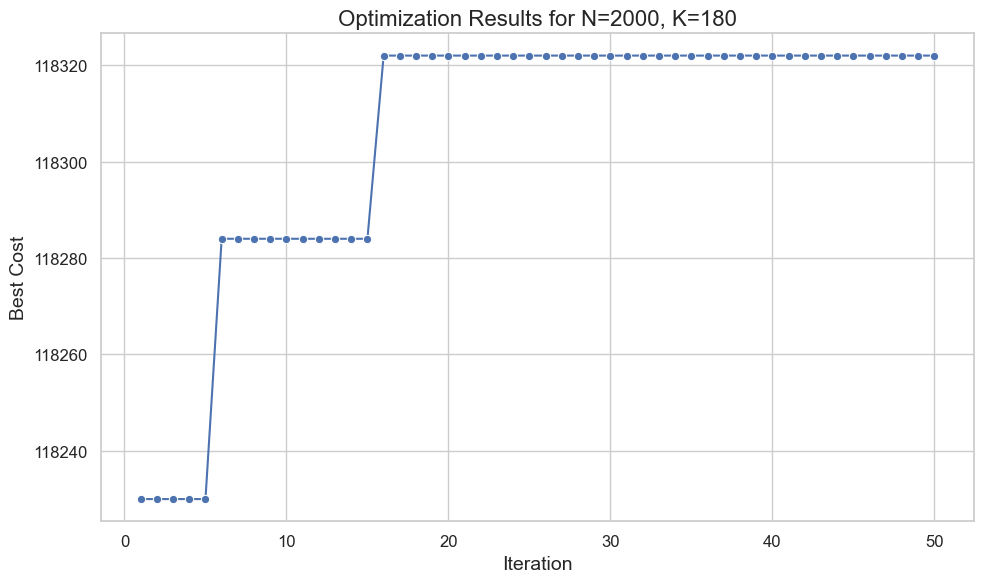

In [24]:

# Data
iteration_data = [(1, 118230), (2, 118230), (3, 118230), (4, 118230), (5, 118230), (6, 118284), (7, 118284), (8, 118284), (9, 118284), (10, 118284), (11, 118284), (12, 118284), (13, 118284), (14, 118284), (15, 118284), (16, 118322), (17, 118322), (18, 118322), (19, 118322), (20, 118322), (21, 118322), (22, 118322), (23, 118322), (24, 118322), (25, 118322), (26, 118322), (27, 118322), (28, 118322), (29, 118322), (30, 118322), (31, 118322), (32, 118322), (33, 118322), (34, 118322), (35, 118322), (36, 118322), (37, 118322), (38, 118322), (39, 118322), (40, 118322), (41, 118322), (42, 118322), (43, 118322), (44, 118322), (45, 118322), (46, 118322), (47, 118322), (48, 118322), (49, 118322), (50, 118322)]

# Plot starting from iteration 13
plot_optimization_results(iteration_data, 2000, 180)



In [18]:
iteration_data = []

# Iteration 1 đến 5: Best Cost = 118230
for i in range(1, 6):
    iteration_data.append((i, 118230))

# Iteration 6 đến 15: Best Cost = 118284
for i in range(6, 16):
    iteration_data.append((i, 118284))

# Iteration 16 đến 50: Best Cost = 118322
for i in range(16, 51):
    iteration_data.append((i, 118322))

# Kiểm tra dữ liệu
print(iteration_data)


[(1, 118230), (2, 118230), (3, 118230), (4, 118230), (5, 118230), (6, 118284), (7, 118284), (8, 118284), (9, 118284), (10, 118284), (11, 118284), (12, 118284), (13, 118284), (14, 118284), (15, 118284), (16, 118322), (17, 118322), (18, 118322), (19, 118322), (20, 118322), (21, 118322), (22, 118322), (23, 118322), (24, 118322), (25, 118322), (26, 118322), (27, 118322), (28, 118322), (29, 118322), (30, 118322), (31, 118322), (32, 118322), (33, 118322), (34, 118322), (35, 118322), (36, 118322), (37, 118322), (38, 118322), (39, 118322), (40, 118322), (41, 118322), (42, 118322), (43, 118322), (44, 118322), (45, 118322), (46, 118322), (47, 118322), (48, 118322), (49, 118322), (50, 118322)]


In [5]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=2000, vehicle_num=180, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

2000 180
14 75
7 30
28 76
21 46
24 67
18 79
18 24
17 75
5 75
27 37
19 100
25 43
14 78
7 46
19 36
12 66
21 34
19 68
24 34
30 59
15 37
12 98
12 79
20 81
10 76
24 90
23 36
10 72
26 82
8 82
22 83
28 32
8 74
6 49
15 27
29 30
23 71
19 31
10 76
26 71
13 93
19 26
27 46
30 36
19 99
6 50
23 54
25 77
14 21
29 41
11 30
14 50
12 45
30 97
27 43
22 83
7 23
27 33
29 62
6 91
30 58
24 60
28 25
11 79
20 69
17 42
13 27
20 61
21 38
26 41
20 38
15 76
30 75
18 79
27 78
28 58
19 37
12 50
10 33
29 77
21 23
16 61
30 49
24 21
27 76
7 21
15 62
26 48
26 76
27 48
15 43
16 79
6 83
19 82
11 60
9 76
11 54
30 32
24 53
13 88
14 83
29 84
8 52
23 64
27 49
20 35
24 36
6 32
14 94
10 63
7 53
6 75
12 51
21 61
29 63
17 46
20 26
13 36
11 24
9 65
25 57
29 69
7 45
6 45
30 40
7 24
20 45
6 62
14 28
11 58
13 68
17 23
15 95
27 95
27 27
9 95
12 32
18 88
19 95
8 48
28 98
9 95
28 29
30 61
26 29
8 51
25 95
16 36
19 49
16 65
11 96
26 79
12 83
13 49
28 60
26 96
15 98
20 62
28 32
13 21
15 100
19 39
22 62
25 22
21 72
23 45
27 29
15 33
13 72


In [16]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=2500, vehicle_num=250, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)


2500 250
30 33
22 94
26 80
17 78
30 51
23 77
9 93
30 92
26 76
24 64
6 86
26 42
15 33
20 72
26 75
29 82
12 49
25 35
21 66
21 77
13 100
7 95
16 89
22 46
29 94
17 93
9 92
9 78
28 87
22 61
24 52
16 87
19 65
12 55
14 44
26 42
20 92
30 72
17 25
28 25
15 58
16 43
8 95
17 53
14 26
30 36
11 64
25 97
24 78
13 50
12 37
9 76
30 32
27 69
18 87
14 22
22 95
7 71
12 79
10 98
24 44
7 71
29 72
5 77
25 89
20 92
16 55
25 33
21 89
19 73
22 61
25 74
23 88
24 83
27 92
13 36
8 64
11 58
26 20
25 23
14 26
10 77
25 61
25 50
18 77
6 62
13 94
12 74
10 30
16 74
11 21
30 72
10 73
25 99
15 24
27 39
12 100
8 74
22 66
29 96
25 84
16 92
21 54
18 65
6 56
6 76
14 23
6 82
16 65
24 36
12 98
7 56
10 61
24 71
10 28
25 28
25 84
13 70
24 98
14 67
22 86
25 93
6 26
27 48
30 53
24 36
17 30
8 31
20 77
17 28
10 30
11 100
24 95
17 44
27 53
25 43
15 60
19 83
16 79
7 98
29 85
20 57
27 25
6 32
25 39
26 36
20 91
30 62
12 72
17 88
12 39
29 54
18 88
8 52
9 53
28 74
11 88
13 53
11 24
20 34
24 61
28 55
23 82
7 53
12 57
13 63
21 43
21 23
9 96

In [ ]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=1600, vehicle_num=120, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

In [1]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=1600, vehicle_num=120, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

1600 120
14 25
13 96
20 58
5 84
21 60
12 42
17 72
7 93
21 83
17 45
19 96
27 78
25 48
12 63
8 75
17 53
15 77
28 94
22 66
27 72
29 69
28 56
23 88
28 82
12 51
25 91
26 96
5 59
13 35
5 71
26 71
25 93
6 35
7 51
19 68
30 96
5 51
15 44
15 56
28 56
28 53
13 29
23 91
27 93
5 25
7 90
22 39
10 58
7 96
15 54
23 78
18 88
13 51
19 30
22 38
20 83
22 43
10 55
12 76
30 91
5 77
25 67
26 63
8 89
24 37
26 67
15 76
21 60
5 37
15 36
28 47
5 32
20 96
10 32
11 63
5 99
30 92
20 83
19 86
24 98
25 30
19 39
20 97
25 24
12 93
23 67
7 44
11 38
30 20
9 82
13 75
20 20
6 88
25 78
10 87
19 43
18 51
19 20
25 35
17 38
29 39
14 25
20 41
28 93
27 54
9 76
7 34
5 75
27 55
8 53
23 20
20 53
11 98
8 94
11 81
30 52
24 40
5 78
24 98
19 67
17 93
15 26
15 92
24 62
6 89
13 95
29 93
18 43
26 71
23 42
6 28
11 88
19 23
6 66
15 35
15 97
26 43
23 61
26 25
15 33
10 77
12 23
23 27
13 85
10 62
9 27
29 28
27 79
5 91
11 80
24 71
22 67
18 63
28 71
22 65
9 98
15 22
8 29
30 92
7 45
19 52
20 68
16 75
29 30
29 44
22 69
23 82
18 86
11 96
24 55
25 7

In [3]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=100, vehicle_num=15, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

100 15
29 35
17 35
23 99
7 38
28 46
12 34
23 60
5 53
9 87
9 38
20 80
10 64
13 30
30 46
24 89
30 65
27 33
10 95
15 62
13 39
18 59
5 60
21 21
9 50
28 20
24 76
20 35
17 91
9 85
12 33
6 24
29 91
28 40
22 41
28 34
20 97
10 89
23 57
8 72
5 84
12 98
19 83
26 36
13 35
28 97
12 71
24 48
24 31
8 83
17 60
5 35
12 57
18 61
24 43
20 64
16 67
18 67
25 55
29 41
8 25
7 72
27 30
25 24
18 73
12 30
6 100
15 41
15 43
24 21
8 89
6 21
13 89
5 70
20 41
26 30
26 71
16 80
7 59
11 62
17 31
14 29
23 98
12 87
16 67
11 87
12 38
17 83
6 76
22 98
23 45
18 53
11 36
30 60
30 35
15 46
28 58
5 24
10 31
27 32
25 21
73 173
56 148
61 141
64 312
75 191
63 151
70 150
65 168
56 146
72 136
64 150
70 124
56 100
59 147
71 162


In [5]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=150, vehicle_num=22, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

150 22
19 97
28 69
27 47
6 31
16 59
21 20
20 68
15 69
13 98
13 63
22 67
13 82
7 77
22 76
11 48
18 24
22 49
29 69
18 42
24 47
29 76
13 47
20 95
10 72
19 80
10 29
28 43
13 81
22 92
25 88
8 95
9 49
13 56
5 29
23 40
20 73
13 95
26 99
23 93
8 29
7 48
16 24
21 71
20 35
8 21
24 69
27 59
15 60
22 29
8 23
11 20
12 59
25 68
21 65
11 22
16 36
27 37
21 43
17 59
26 82
6 84
6 43
11 24
10 55
29 20
7 41
12 59
10 89
24 77
30 84
13 61
22 76
19 52
17 76
28 49
19 78
29 89
11 84
10 64
26 54
22 48
14 51
18 42
10 81
30 100
30 57
10 89
22 40
6 36
29 86
15 21
20 74
8 82
16 88
13 41
23 97
11 38
5 24
27 50
18 45
10 94
22 30
9 23
6 86
9 67
17 95
13 63
24 60
27 56
6 89
11 68
7 100
21 86
18 63
30 82
17 80
16 82
27 39
11 94
10 65
7 27
22 66
5 63
7 51
30 80
21 98
24 48
17 100
16 98
11 40
17 27
14 51
15 58
30 49
16 81
19 74
22 88
22 94
21 76
14 61
24 35
12 22
29 64
27 45
12 82
9 20
21 72
12 54
25 26
27 76
53 64
55 146
64 171
71 102
75 105
74 200
65 166
63 168
62 175
50 159
59 147
55 190
51 127
58 108
59 105
70 209
53 

In [7]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=200, vehicle_num=30, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

200 30
21 50
13 28
24 75
20 94
27 25
23 81
17 73
19 87
6 57
20 83
8 71
27 75
21 100
7 99
22 88
13 66
9 57
6 24
22 81
7 100
5 21
18 64
14 75
18 89
19 79
20 81
10 70
29 91
25 66
9 95
30 50
7 44
13 98
30 98
13 72
11 59
15 76
29 73
9 79
25 54
10 33
17 58
20 36
22 62
29 21
30 52
9 41
21 87
5 65
10 50
22 67
17 41
7 47
15 24
9 79
22 74
26 58
25 27
19 77
7 61
11 64
14 95
19 25
9 78
8 57
29 29
12 27
22 27
9 25
6 24
30 64
17 98
8 50
16 46
11 76
11 62
8 92
24 27
14 26
19 72
14 92
10 58
14 34
10 37
19 71
26 26
9 85
27 57
14 100
8 82
14 20
15 91
22 29
20 99
7 52
7 93
13 31
12 55
19 45
8 66
15 88
26 22
17 60
28 65
28 26
27 75
13 45
17 100
6 82
20 28
23 45
21 85
7 35
21 59
20 72
20 36
30 93
5 70
29 92
19 33
16 63
21 91
21 60
29 89
7 79
28 89
11 100
7 68
28 39
27 97
17 89
19 45
30 32
19 29
8 97
21 58
29 37
17 59
28 23
9 37
27 55
15 67
15 32
27 84
6 55
25 57
7 22
21 96
13 91
12 68
30 79
5 84
17 41
15 31
29 63
11 63
21 22
8 52
9 39
13 22
15 28
23 97
29 26
9 47
27 20
6 35
24 42
19 45
21 73
24 82
11 93
18

In [13]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=250, vehicle_num=37, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

250 37
19 86
19 96
5 37
25 20
22 77
9 90
10 36
15 24
29 87
5 65
8 92
18 85
10 67
5 22
28 38
15 60
22 61
26 82
11 65
7 75
13 32
14 54
16 81
12 79
23 69
9 25
27 56
24 100
16 63
11 53
10 33
28 29
6 94
8 57
18 86
21 41
19 93
14 48
23 42
28 32
18 84
17 30
5 24
11 31
7 42
26 94
30 90
19 32
14 86
24 73
16 32
14 25
6 69
23 50
6 32
20 71
12 45
29 70
20 82
29 32
20 26
11 93
7 85
18 97
27 97
7 79
7 33
24 44
10 40
5 44
18 64
20 94
18 66
21 69
20 35
13 99
5 30
24 25
13 43
8 87
10 95
21 96
14 48
23 49
10 40
30 29
23 97
29 55
11 96
13 57
8 95
13 100
12 80
10 68
25 45
22 47
7 94
30 30
30 51
21 50
13 41
14 71
8 20
13 73
7 93
9 46
13 40
14 60
15 52
9 25
25 82
6 57
29 31
24 51
29 96
13 58
5 100
30 87
19 93
13 57
27 91
16 53
7 76
5 65
22 76
24 26
12 98
15 67
21 32
11 43
25 56
15 33
21 54
24 64
9 61
23 88
14 20
7 34
7 41
28 64
21 93
8 77
5 31
13 34
21 25
12 74
15 48
20 34
13 42
8 70
16 32
19 60
6 71
19 98
15 54
8 47
25 72
16 32
17 79
10 33
28 34
28 40
9 65
17 50
20 88
5 57
13 76
11 80
28 46
26 44
9 50
22 5

In [21]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=700, vehicle_num=90, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

700 90
7 74
19 58
29 52
23 28
20 25
19 74
9 67
24 80
25 43
24 54
27 21
9 91
25 52
17 20
29 69
29 59
28 35
27 31
30 27
20 88
26 20
21 61
13 50
27 67
23 43
24 65
9 74
29 49
20 43
28 50
20 93
21 68
24 62
23 99
15 30
17 41
5 45
24 48
10 73
22 58
26 89
22 39
20 40
23 52
27 70
30 53
14 38
26 38
25 96
10 38
13 78
22 46
30 37
7 32
9 27
12 52
24 26
15 85
27 47
5 58
12 88
18 51
16 37
11 36
30 83
24 62
14 84
18 34
6 94
22 92
27 97
5 64
16 71
24 24
23 76
15 79
22 68
12 49
19 84
17 25
15 100
30 73
19 59
11 78
15 90
12 83
19 27
13 91
15 47
29 26
15 45
11 68
28 55
5 25
28 27
12 89
10 81
9 78
16 57
26 46
7 90
5 26
24 41
29 45
11 89
29 36
24 75
30 74
25 48
26 89
5 58
26 37
19 63
28 61
16 94
20 20
28 78
15 77
8 97
12 58
13 54
5 40
14 38
28 23
29 85
9 44
17 62
18 74
11 24
10 52
26 35
5 27
26 90
8 85
23 41
22 38
5 47
16 41
15 89
16 38
14 45
5 35
5 59
21 33
21 50
24 57
7 91
21 69
18 67
23 52
16 85
10 22
12 32
29 95
20 30
13 37
8 40
27 29
10 26
12 86
11 55
27 90
15 30
6 39
19 60
29 21
20 24
28 75
16 78
26 3

In [23]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=1000, vehicle_num=120, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

1000 120
9 91
7 52
28 34
29 76
20 39
16 95
9 31
30 48
26 67
29 91
15 30
8 49
27 81
15 36
16 60
18 48
10 71
18 78
9 84
27 70
16 42
23 32
27 71
30 29
17 63
25 65
18 52
19 72
12 62
13 85
27 55
16 76
16 76
13 33
27 59
9 33
24 93
20 52
18 39
25 92
11 51
14 88
29 65
18 38
16 84
25 50
28 75
24 89
5 69
19 56
28 68
22 20
27 90
15 82
28 70
18 90
17 75
30 60
19 96
15 29
18 77
16 81
18 94
11 20
24 78
15 50
28 43
25 98
23 59
30 39
10 28
13 82
13 69
6 81
14 81
30 97
28 23
23 76
14 77
10 99
7 64
20 96
14 67
19 52
9 78
19 77
30 22
17 30
21 59
12 92
7 94
20 98
6 60
10 49
7 58
24 47
19 41
10 39
14 72
19 39
6 95
13 87
10 62
29 84
7 59
17 40
27 76
17 89
20 57
6 42
22 75
14 32
6 40
11 75
7 58
20 89
11 38
7 28
8 57
27 70
8 60
18 62
19 87
7 23
17 45
17 21
21 50
19 50
9 25
28 76
25 23
17 59
21 88
7 29
9 97
5 74
26 44
24 86
29 96
19 46
6 43
14 58
29 30
7 75
25 96
14 65
6 46
25 87
7 82
28 67
21 27
6 24
30 64
13 87
30 79
13 62
24 27
18 88
16 28
22 69
13 36
30 84
10 51
8 73
23 67
19 42
27 34
9 71
22 57
9 33
17 38

### Input cho Greedy Algorithm

In [27]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=100, vehicle_num=10, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

100 10
20 100
12 27
14 82
8 27
27 95
14 21
5 94
29 95
14 24
17 25
15 71
8 33
11 99
20 66
22 80
20 86
5 77
18 64
11 42
13 65
5 20
19 80
9 67
13 58
19 33
25 55
27 67
18 20
8 27
24 59
6 56
19 57
30 54
21 98
11 84
16 80
24 55
20 49
28 73
20 77
21 51
15 22
23 36
30 82
11 81
14 23
23 55
21 71
9 25
8 63
18 85
11 38
20 75
7 58
25 88
20 47
19 72
22 70
20 22
14 33
29 55
12 56
25 43
11 24
25 84
24 52
10 78
15 34
17 60
5 47
22 29
28 98
16 89
25 41
18 48
16 71
22 29
12 47
15 62
8 72
27 53
29 70
15 28
15 60
9 70
7 52
28 38
20 87
28 50
13 93
27 47
7 83
7 51
19 74
8 63
30 84
12 46
15 27
28 74
15 35
65 107
62 212
64 234
66 214
64 176
67 228
64 162
50 205
53 242
68 207


In [44]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=500, vehicle_num=30, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

500 30
29 86
12 83
12 37
26 54
8 29
12 26
25 72
5 97
14 94
21 94
7 36
28 30
27 49
19 70
30 61
9 56
29 99
27 78
11 74
22 55
24 50
11 34
28 98
28 82
22 86
7 38
9 93
29 61
8 27
30 69
21 74
11 57
22 21
8 75
24 79
23 21
15 90
13 55
16 83
20 20
20 72
26 99
24 80
25 23
19 89
7 29
19 87
23 22
20 33
24 50
24 69
15 61
23 44
10 60
29 35
15 46
9 23
24 45
15 28
21 30
26 77
5 59
21 32
7 36
8 63
17 34
18 50
14 58
13 59
5 80
22 74
22 82
9 94
5 74
27 58
21 90
8 42
20 72
30 73
14 94
10 92
28 64
12 65
22 56
15 75
21 77
9 27
10 21
29 34
21 84
19 26
25 95
8 58
17 43
12 68
12 91
28 43
26 37
26 84
23 97
26 77
18 90
21 67
13 67
14 59
19 39
9 58
30 81
13 40
10 22
25 97
12 28
21 61
22 35
29 65
18 95
8 65
24 63
16 26
11 57
24 66
30 51
16 84
26 55
25 33
11 71
14 38
28 86
8 69
14 53
6 29
14 73
11 91
26 57
10 70
17 25
30 74
30 93
15 77
20 25
17 78
23 55
11 82
28 72
15 61
10 69
22 70
17 82
8 84
15 62
27 55
10 35
5 88
21 47
11 51
13 57
13 98
11 26
13 73
15 44
20 97
21 38
6 81
16 86
21 54
5 61
29 50
8 31
20 76
6 67
13

In [48]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=500, vehicle_num=50, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

500 50
10 27
11 69
5 21
13 55
6 99
7 30
15 53
14 28
8 35
11 47
30 57
20 59
17 24
5 83
21 68
16 62
22 75
9 85
7 36
15 39
13 80
8 84
18 79
14 81
18 39
11 48
19 99
22 28
12 30
26 79
20 98
12 95
7 94
9 64
30 49
26 67
26 74
8 88
24 82
15 87
24 33
6 95
28 72
26 95
10 66
29 74
30 88
15 52
5 57
30 34
12 25
24 96
28 71
6 56
14 27
27 71
13 64
18 41
5 49
13 23
20 59
16 90
8 36
10 79
28 91
9 58
29 63
28 34
28 49
7 27
22 68
26 48
17 72
22 22
5 43
13 80
9 59
20 96
10 57
6 58
28 44
27 49
12 69
18 66
11 82
20 97
26 44
23 61
30 20
6 73
22 96
13 78
6 89
7 92
15 88
19 45
5 26
23 43
22 62
25 43
22 94
24 40
13 61
26 53
28 88
6 67
11 63
27 74
10 38
29 66
15 37
26 24
18 23
17 92
18 67
18 49
5 54
28 46
25 39
19 38
20 94
13 21
18 74
28 25
10 83
11 91
22 80
19 31
6 31
15 30
16 48
29 82
8 66
28 89
20 60
15 53
26 66
5 69
11 25
13 36
26 60
27 47
18 39
27 75
23 65
29 35
24 89
24 84
5 37
7 30
28 41
5 47
17 35
7 53
15 90
19 94
23 64
30 67
8 93
11 26
17 37
24 85
20 91
29 38
27 70
7 81
28 70
10 54
5 57
21 33
13 57
28 2

In [54]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=1000, vehicle_num=90, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

1000 90
8 51
16 54
23 30
11 73
18 42
16 53
27 31
23 49
28 47
29 45
27 65
8 29
22 34
30 63
15 88
24 54
9 77
28 77
26 98
9 89
25 46
24 25
28 21
25 60
18 57
11 69
7 29
7 34
21 98
27 79
11 100
15 71
30 22
5 76
10 79
12 29
14 73
23 70
27 93
17 84
21 90
10 34
20 61
23 63
8 84
26 20
29 84
10 63
29 100
12 92
17 63
29 24
17 27
21 20
19 57
27 78
23 99
8 81
28 43
12 69
8 23
30 38
25 62
12 32
20 52
11 21
20 62
14 83
21 72
6 73
18 100
24 38
19 63
26 70
10 58
8 22
17 63
28 32
14 64
21 41
29 82
21 70
19 84
10 91
19 28
9 82
20 100
5 60
25 26
13 81
18 34
5 86
15 74
17 66
22 30
26 89
7 48
23 34
20 89
19 79
23 56
28 22
24 47
10 75
14 52
6 100
10 33
8 84
16 100
25 30
11 71
24 32
9 39
30 48
24 29
20 97
30 27
17 76
26 73
28 83
9 100
27 46
18 41
22 88
18 94
29 60
30 82
21 89
26 65
20 29
21 78
5 87
7 52
17 72
18 38
7 36
20 78
16 26
25 65
19 52
16 26
29 56
11 94
26 73
24 52
8 76
18 84
10 70
26 76
5 46
25 49
11 65
11 21
21 77
9 43
16 80
24 64
30 88
25 67
7 72
10 26
12 72
21 21
21 71
16 93
9 82
12 66
13 60
5 97


In [60]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=700, vehicle_num=80, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

700 80
27 93
12 45
15 24
26 51
12 53
27 85
9 98
7 92
10 61
15 37
25 31
6 53
24 93
18 87
6 73
6 28
13 30
6 61
28 51
14 80
16 92
27 92
18 27
9 72
13 82
16 42
5 36
6 62
17 66
20 29
24 50
17 84
14 97
23 70
21 52
20 83
17 35
17 20
10 32
25 56
27 63
5 74
26 66
23 20
21 91
21 22
18 22
17 39
8 43
9 55
28 38
18 37
29 22
20 66
5 51
6 49
25 36
22 36
24 58
17 34
15 33
30 20
6 81
22 26
13 44
22 55
26 62
24 42
10 95
11 81
29 88
28 57
17 93
15 29
30 98
6 85
13 60
9 60
9 27
20 34
18 42
19 36
9 35
21 91
30 64
10 85
27 74
23 84
15 56
15 97
16 40
16 45
13 68
7 42
23 92
28 80
18 87
30 22
23 51
30 43
25 74
8 31
21 54
16 52
27 52
30 91
30 63
20 30
6 27
5 41
9 51
7 27
8 22
13 87
27 84
15 47
12 24
15 90
8 100
5 70
22 42
25 66
21 98
27 97
18 62
15 35
13 48
10 38
6 83
11 65
20 50
8 89
18 90
28 97
6 52
24 60
22 78
29 78
20 45
28 54
27 64
9 86
30 72
8 91
20 59
28 22
27 46
13 76
23 74
7 71
6 97
17 45
13 47
26 83
12 89
8 53
12 82
23 95
15 86
26 23
19 96
23 62
26 36
18 60
5 63
5 50
23 59
16 52
9 22
17 56
25 82
30 76

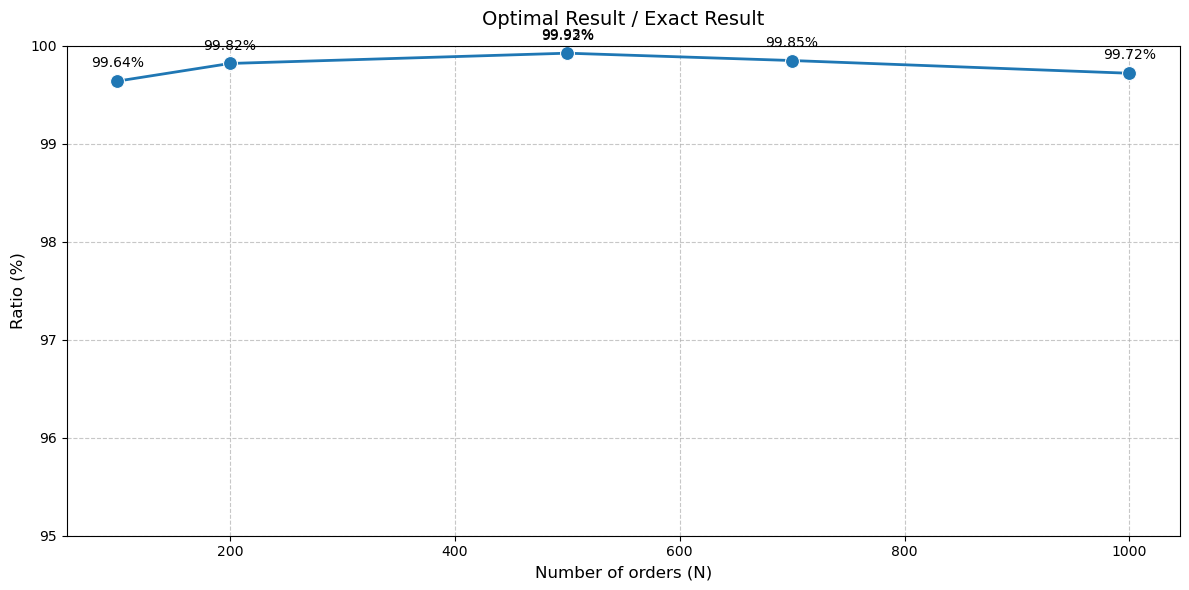

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create data
data = {
    'N': [100, 200, 500, 500, 700, 1000],
    'Accuracy': [99.64, 99.82, 99.92, 99.93, 99.85, 99.72]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create figure
plt.figure(figsize=(12, 6))

# Create line plot
sns.lineplot(data=df, x='N', y='Accuracy', marker='o', linewidth=2, markersize=10)

# Customize plot
plt.title('Optimal Result / Exact Result', fontsize=14, pad=15)
plt.xlabel('Number of orders (N)', fontsize=12)
plt.ylabel('Ratio (%)', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate points
for i, row in df.iterrows():
    plt.annotate(f'{row["Accuracy"]}%',
                xy=(row['N'], row['Accuracy']),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center')

# Set y-axis limits from 95% to 100%
plt.ylim(95, 100)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Evaluating Greedy Local 

In [5]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=100, vehicle_num=10, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

100 10
28 22
7 49
13 77
5 42
26 79
19 95
16 78
22 60
20 47
6 31
22 82
16 25
9 39
9 48
5 35
22 33
13 28
11 73
6 42
13 60
11 100
5 87
12 25
16 47
18 24
28 25
6 84
12 82
7 65
12 48
15 22
20 57
10 91
21 52
7 57
12 53
30 100
29 42
11 80
13 76
8 90
18 40
17 20
21 71
10 91
19 66
13 93
9 51
18 57
11 91
25 98
9 33
22 66
27 31
11 41
27 70
23 37
15 54
8 99
11 33
19 81
7 60
28 54
6 50
26 24
5 89
27 83
26 32
24 35
22 33
6 88
30 50
22 63
17 47
7 62
12 57
6 70
9 86
26 29
8 74
7 39
22 87
29 87
16 67
18 50
9 67
26 20
17 60
25 50
20 82
8 76
8 91
5 90
25 56
23 81
14 50
23 62
20 28
14 58
25 41
53 98
71 197
73 216
57 154
70 129
75 203
54 243
64 191
75 195
58 177


In [11]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=300, vehicle_num=45, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

300 45
12 75
26 98
27 45
5 41
6 98
10 40
19 68
29 60
20 68
10 83
7 57
10 39
28 63
6 66
25 81
15 75
20 30
8 57
8 30
14 56
20 21
21 57
22 27
12 23
11 82
30 39
5 38
27 79
19 77
11 94
9 20
19 27
27 83
30 59
9 90
19 76
14 27
7 62
19 82
14 22
11 95
7 99
20 79
6 76
15 41
23 75
24 88
24 81
24 89
8 99
12 97
15 50
10 29
26 48
10 27
8 51
28 23
9 42
27 47
29 77
16 66
19 76
28 81
15 29
11 28
14 78
26 60
20 63
24 97
29 59
11 61
14 73
13 85
17 42
27 55
23 47
14 40
30 46
26 99
21 24
27 45
21 53
10 100
15 55
16 95
8 37
8 88
15 56
11 99
5 31
26 57
13 20
24 34
21 81
29 51
8 66
29 62
11 34
5 76
15 73
9 83
28 26
29 33
10 95
27 41
6 43
17 61
22 34
24 74
17 72
24 96
10 27
8 46
19 66
26 32
9 35
9 93
21 40
13 73
5 96
29 88
5 29
28 35
27 85
24 37
14 100
30 84
25 48
16 73
23 25
17 48
19 65
12 41
19 89
20 88
10 69
12 62
14 49
13 46
17 91
13 72
17 74
28 70
16 22
29 81
27 78
17 48
7 89
10 99
13 80
27 77
6 49
19 55
12 40
29 33
23 68
18 50
8 66
28 42
13 34
12 93
15 56
22 73
15 23
26 42
16 84
8 65
7 68
19 52
16 93
12 

In [25]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=500, vehicle_num=60, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

500 60
21 69
29 48
5 88
14 56
16 25
6 84
28 43
17 32
26 37
21 34
21 37
19 64
30 99
29 60
21 94
26 24
9 37
10 39
29 36
28 53
15 80
29 31
8 21
18 42
24 60
26 48
14 56
8 54
10 72
21 45
30 74
7 82
10 71
20 23
21 82
23 89
9 47
30 83
24 25
13 50
9 67
23 86
21 41
21 92
9 63
15 69
28 33
16 48
19 90
22 75
28 83
12 42
17 30
9 51
13 31
25 100
24 89
15 87
17 63
21 63
13 69
29 91
10 23
9 46
9 86
11 95
5 36
13 60
10 21
22 48
9 54
30 92
7 81
29 89
19 46
12 76
26 98
16 100
16 21
24 91
6 75
13 90
14 100
8 23
10 30
16 37
6 69
11 68
10 78
24 92
11 68
5 51
5 75
21 53
17 74
11 66
22 83
7 67
26 82
21 38
22 53
24 61
19 93
19 93
24 45
16 80
16 48
10 70
23 38
19 66
29 47
7 69
17 78
26 65
25 56
14 63
13 44
20 42
20 50
20 84
14 49
9 31
30 32
24 75
28 90
27 32
6 20
22 43
8 43
27 79
28 77
16 69
12 44
23 47
20 62
5 21
7 63
18 24
21 48
27 51
9 23
20 60
9 44
28 28
15 67
19 75
29 37
11 57
7 83
5 22
7 96
29 78
11 53
6 32
23 84
25 82
25 55
6 55
12 68
11 90
17 60
21 98
9 71
16 74
13 45
19 89
20 35
27 87
7 71
12 22
28 40


C:\Users\Admin\AppData\Local\Temp\ipykernel_5936\1849874506.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Vehicle", y="full vehicle ratio (%)", data=df, palette="Blues_d")


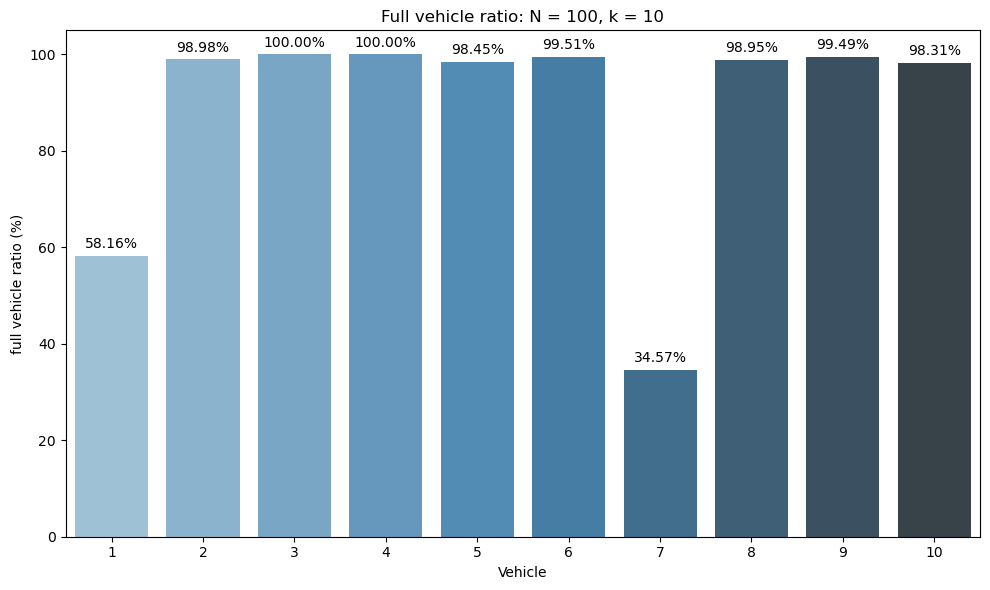

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dữ liệu tỉ lệ lấp đầy của từng phương tiện
data = {
    "Vehicle": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "full vehicle ratio (%)": [58.16, 98.98, 100.00, 100.00, 98.45, 99.51, 34.57, 98.95, 99.49, 98.31]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Vẽ biểu đồ hình chữ nhật
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Vehicle", y="full vehicle ratio (%)", data=df, palette="Blues_d")

# Thêm nhãn giá trị phần trăm lên từng cột
for index, row in enumerate(df["full vehicle ratio (%)"]):
    barplot.text(index, row + 1, f"{row:.2f}%", color="black", ha="center", va="bottom", fontsize=10)

# Thêm tiêu đề và nhãn
plt.title("Full vehicle ratio: N = 100, k = 10")
plt.xlabel("Vehicle")
plt.ylabel("full vehicle ratio (%)")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_5936\683411671.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Vehicle", y="full vehicle ratio (%)", data=df, palette="Blues_d")


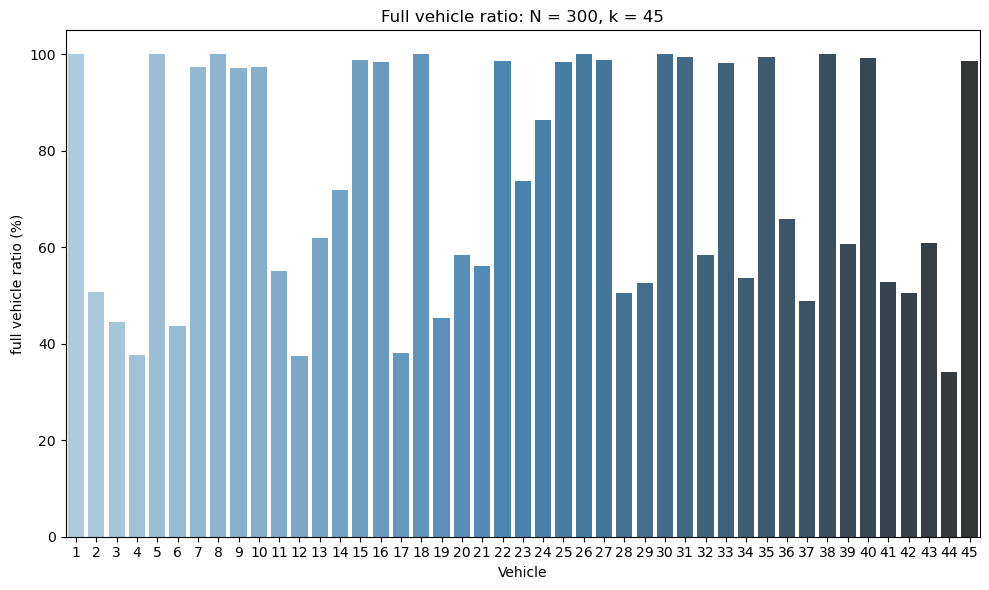

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dữ liệu tỉ lệ lấp đầy của từng phương tiện
data = {
    "Vehicle": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
               21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 
               39, 40, 41, 42, 43, 44, 45],
    "full vehicle ratio (%)": [100.00, 50.74, 44.44, 37.59, 100.00, 43.70, 97.30, 100.00, 97.26, 97.48, 
                 55.08, 37.50, 62.03, 71.84, 98.78, 98.38, 38.03, 100.00, 45.26, 58.33, 
                 56.07, 98.70, 73.79, 86.42, 98.38, 100.00, 98.88, 50.44, 52.51, 100.00, 
                 99.40, 58.40, 98.17, 53.64, 99.43, 65.82, 48.95, 100.00, 60.71, 99.30, 
                 52.80, 50.53, 60.94, 34.14, 98.61]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Vẽ biểu đồ hình chữ nhật
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Vehicle", y="full vehicle ratio (%)", data=df, palette="Blues_d")

# Thêm nhãn giá trị phần trăm lên từng cột
# for index, row in enumerate(df["full vehicle ratio (%)"]):
#     barplot.text(index, row + 1, f"{row:.2f}%", color="black", ha="center", va="bottom", fontsize=10)

# Thêm tiêu đề và nhãn
plt.title("Full vehicle ratio: N = 300, k = 45")
plt.xlabel("Vehicle")
plt.ylabel("full vehicle ratio (%)")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5936\2056935133.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_ids, y=fill_rates, palette="viridis")


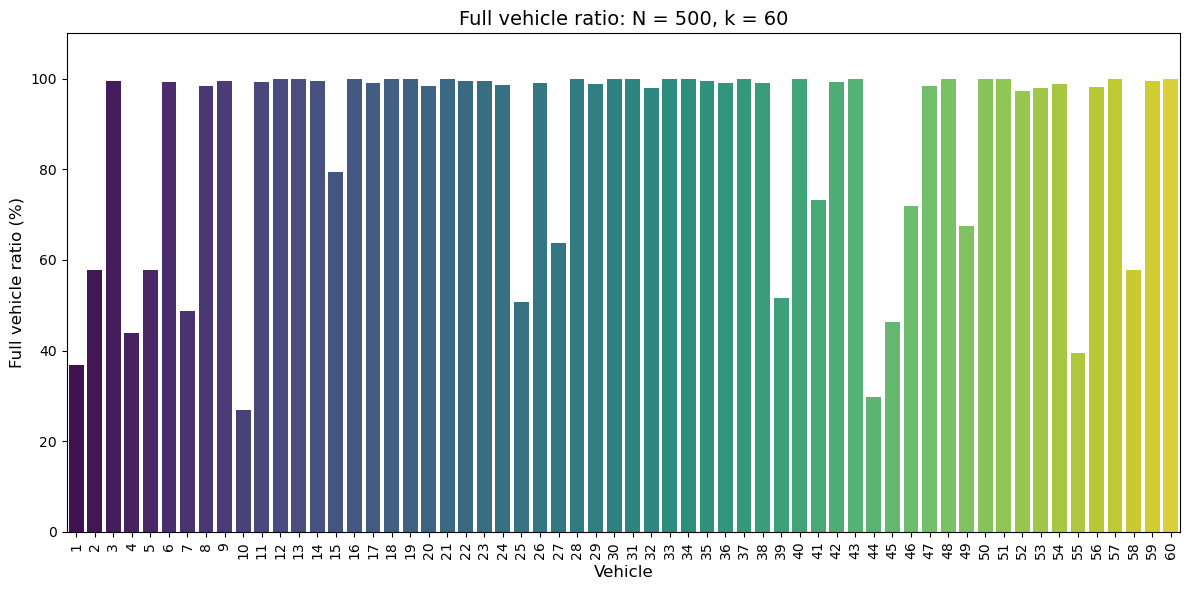

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dữ liệu về tỉ lệ lấp đầy
vehicle_ids = list(range(1, 61))
fill_rates = [36.94, 57.89, 99.48, 43.80, 57.89, 99.35, 48.80, 98.31, 99.47, 26.98, 
              99.27, 100.00, 100.00, 99.45, 79.52, 100.00, 98.98, 100.00, 100.00, 98.34,
              100.00, 99.40, 99.43, 98.55, 50.83, 98.95, 63.73, 100.00, 98.77, 100.00,
              100.00, 98.03, 100.00, 100.00, 99.53, 99.03, 100.00, 99.09, 51.61, 100.00,
              73.27, 99.36, 100.00, 29.73, 46.37, 71.95, 98.31, 100.00, 67.44, 100.00,
              100.00, 97.28, 97.91, 98.85, 39.46, 98.17, 100.00, 57.73, 99.52, 100.00]

# Tạo biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_ids, y=fill_rates, palette="viridis")

# Thiết lập tiêu đề và nhãn trục
plt.title("Full vehicle ratio: N = 500, k = 60", fontsize=14)
plt.xlabel("Vehicle", fontsize=12)
plt.ylabel("Full vehicle ratio (%)", fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Giới hạn trục tung để dễ quan sát

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### Ant Colony Optimization

In [54]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=1000, vehicle_num=90, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

1000 90
28 80
28 92
24 57
21 89
11 90
21 30
8 31
11 70
9 23
5 68
22 32
5 89
6 60
17 83
12 58
13 32
28 24
6 51
14 50
15 21
22 56
26 59
11 95
28 94
5 84
9 67
19 60
19 97
27 24
11 27
13 27
8 82
28 33
16 76
23 100
13 94
10 93
16 97
27 50
24 49
18 96
12 82
29 34
12 32
27 76
9 78
21 94
18 80
12 70
20 47
17 32
26 44
20 32
28 21
20 30
18 52
14 23
17 40
11 52
15 37
12 26
17 64
11 100
19 63
17 28
27 57
27 46
28 52
8 25
19 71
29 97
15 100
17 76
7 37
12 98
26 30
30 74
19 35
7 22
13 71
12 36
16 67
5 80
26 31
21 24
19 94
30 63
11 29
9 40
9 22
10 53
7 67
20 78
30 78
18 35
16 64
12 44
14 29
20 70
19 87
20 82
27 51
15 64
21 52
14 65
6 90
30 87
5 27
29 48
14 65
28 94
17 48
9 90
21 46
7 96
22 47
27 98
19 95
13 42
23 30
8 55
28 79
14 76
22 63
16 54
20 22
22 66
13 43
23 36
23 26
9 99
23 85
10 56
21 21
15 20
17 63
8 47
30 84
30 37
13 39
24 53
9 93
25 90
19 71
28 81
28 68
25 90
29 41
23 81
17 58
18 77
13 23
20 25
17 43
18 37
19 42
25 84
6 99
25 27
30 98
23 67
13 84
7 37
20 80
20 31
7 26
16 96
23 20
19 67
30 

C:\Users\Admin\AppData\Local\Temp\ipykernel_5936\2816401307.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_ids, y=fill_rates, palette="viridis")


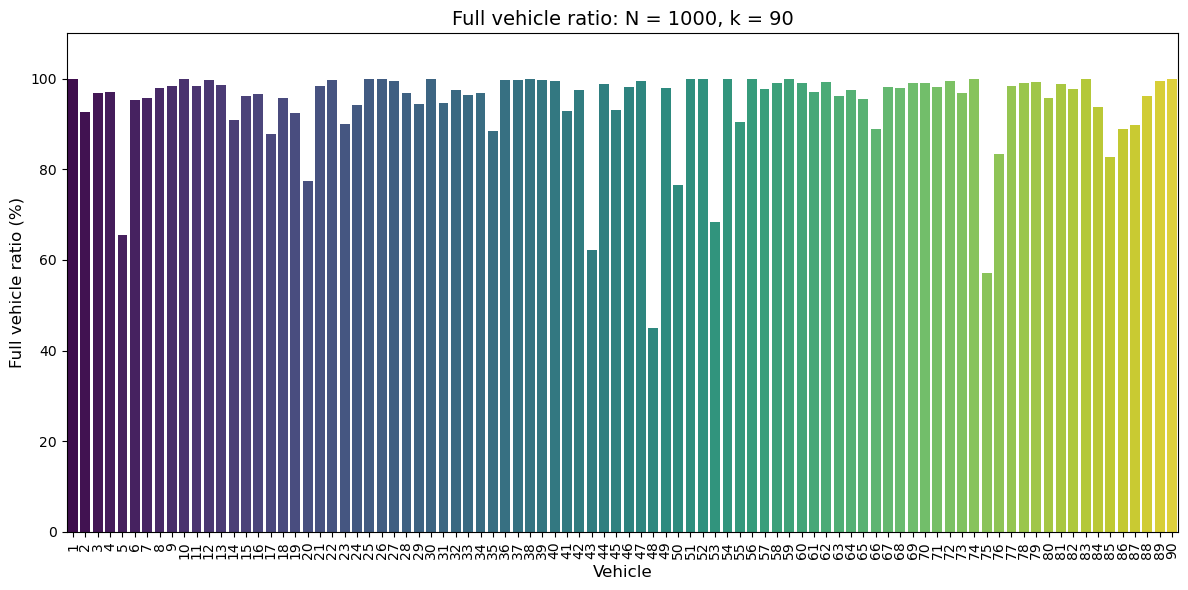

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dữ liệu về tỉ lệ lấp đầy
vehicle_ids = list(range(1, 91))
fill_rates = [100.00, 92.56, 96.83, 97.06, 65.61, 95.26, 95.73, 98.02, 98.42, 100.00,
98.39, 99.67, 98.51, 90.85, 96.18, 96.67, 87.80, 95.75, 92.50, 77.46,
98.34, 99.61, 89.92, 94.20, 100.00, 100.00, 99.51, 96.84, 94.37, 100.00,
94.55, 97.44, 96.43, 96.81, 88.52, 99.63, 99.62, 100.00, 99.62, 99.49,
92.78, 97.58, 62.30, 98.85, 93.17, 98.11, 99.50, 44.90, 97.90, 76.44,
100.00, 100.00, 68.35, 100.00, 90.51, 100.00, 97.73, 98.98, 100.00, 99.02,
96.97, 99.26, 96.27, 97.60, 95.43, 88.82, 98.10, 98.03, 99.00, 99.12,
98.06, 99.51, 96.92, 100.00, 57.23, 83.43, 98.33, 99.02, 99.19, 95.68,
98.80, 97.83, 100.00, 93.75, 82.80, 88.89, 89.71, 96.17, 99.48, 100.00]


# Tạo biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_ids, y=fill_rates, palette="viridis")

# Thiết lập tiêu đề và nhãn trục
plt.title("Full vehicle ratio: N = 1000, k = 90", fontsize=14)
plt.xlabel("Vehicle", fontsize=12)
plt.ylabel("Full vehicle ratio (%)", fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Giới hạn trục tung để dễ quan sát

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5936\2175877396.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_ids, y=fill_rates, palette="viridis")


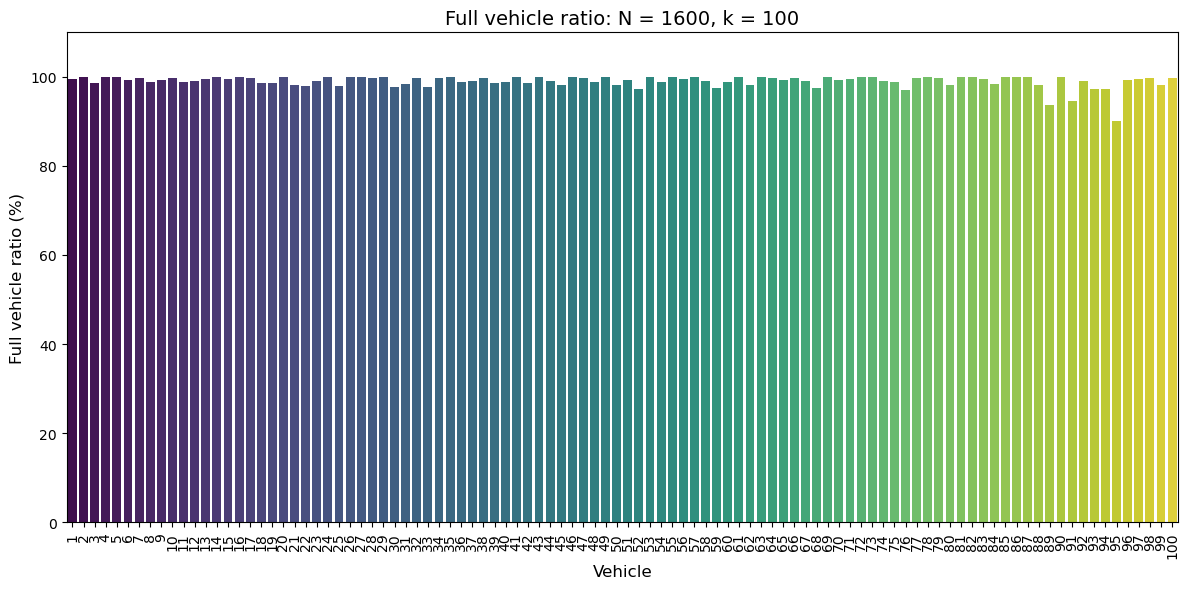

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dữ liệu về tỉ lệ lấp đầy
vehicle_ids = list(range(1, 101))
fill_rates = [99.57, 100.00, 98.56, 100.00, 100.00, 99.19, 99.67, 98.93, 99.31, 99.75, 
98.84, 99.01, 99.51, 100.00, 99.43, 100.00, 99.71, 98.67, 98.56, 100.00, 
98.10, 97.92, 99.04, 100.00, 98.04, 100.00, 100.00, 99.65, 100.00, 97.74, 
98.38, 99.64, 97.66, 99.64, 100.00, 98.95, 99.18, 99.68, 98.67, 98.88, 
100.00, 98.72, 100.00, 98.98, 98.11, 100.00, 99.80, 98.94, 100.00, 98.16, 
99.34, 97.23, 100.00, 98.79, 100.00, 99.50, 100.00, 99.07, 97.45, 98.94, 
100.00, 98.25, 100.00, 99.72, 99.24, 99.64, 99.18, 97.40, 100.00, 99.22, 
99.59, 100.00, 100.00, 99.03, 98.95, 97.08, 99.69, 100.00, 99.73, 98.26, 
100.00, 100.00, 99.45, 98.41, 100.00, 100.00, 100.00, 98.06, 93.64, 100.00, 
94.59, 98.96, 97.18, 97.27, 90.08, 99.38, 99.57, 99.66, 98.19, 99.66]



# Tạo biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_ids, y=fill_rates, palette="viridis")

# Thiết lập tiêu đề và nhãn trục
plt.title("Full vehicle ratio: N = 1600, k = 100", fontsize=14)
plt.xlabel("Vehicle", fontsize=12)
plt.ylabel("Full vehicle ratio (%)", fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Giới hạn trục tung để dễ quan sát

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [3]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=100, vehicle_num=10, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

100 10
18 21
25 28
24 91
12 58
17 27
12 78
23 63
29 24
28 30
28 21
7 94
7 27
26 62
10 34
25 55
12 59
23 70
29 66
18 23
20 37
8 27
9 22
24 32
8 37
28 31
30 76
18 76
11 20
29 60
25 51
23 80
18 41
10 21
8 21
26 26
11 58
17 48
19 67
7 42
6 90
8 69
12 24
17 39
22 73
26 71
6 53
7 95
28 36
19 29
27 100
14 21
6 34
16 37
11 74
30 55
11 89
29 78
11 31
27 56
24 51
27 66
10 26
26 98
20 68
10 47
29 89
23 79
29 97
6 24
10 80
20 30
27 78
12 90
14 97
21 72
23 49
10 59
14 94
5 99
12 53
21 100
25 50
29 89
8 86
12 41
5 51
8 29
27 20
6 44
11 25
7 61
5 30
6 92
21 45
15 77
18 99
12 33
24 55
11 79
8 22
68 179
61 213
75 171
64 161
55 204
52 214
69 152
52 271
59 167
55 192


In [7]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=300, vehicle_num=25, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

300 25
19 59
7 31
14 26
23 71
21 87
5 25
30 37
20 24
13 43
24 75
22 83
25 61
23 31
6 90
30 55
19 99
17 36
21 28
30 62
14 61
6 73
22 30
12 39
25 62
21 46
18 27
26 100
16 39
21 90
22 79
20 71
29 75
18 99
13 25
15 57
29 51
6 39
5 73
12 32
14 89
15 94
10 43
6 27
23 54
14 55
5 60
7 25
20 62
19 56
22 85
6 58
23 51
30 36
12 94
20 72
23 72
24 70
20 49
21 76
25 62
13 51
14 68
28 37
26 81
12 92
26 82
7 31
12 37
11 84
19 40
24 35
12 83
26 75
13 95
25 91
19 67
14 32
24 81
28 68
12 85
19 31
22 84
28 40
30 59
29 85
9 96
6 71
30 89
26 92
18 95
13 33
12 97
11 45
13 28
25 47
14 94
10 44
9 100
24 36
25 70
8 46
27 59
13 95
23 57
19 91
23 53
16 38
12 71
19 35
18 20
15 64
30 49
30 36
22 21
26 27
21 40
30 57
16 89
22 89
9 36
12 31
13 100
16 99
7 98
24 95
24 51
9 100
15 51
22 100
28 32
13 48
5 94
13 46
29 72
7 71
24 80
14 72
18 97
29 81
12 31
29 54
18 41
18 38
23 82
26 99
9 21
19 27
10 36
5 92
27 72
12 81
25 34
20 32
30 68
10 81
10 62
6 28
22 84
19 25
10 27
15 78
7 44
19 90
10 50
22 48
22 87
29 60
18 100
14 

In [11]:
import random

def generate_input(order_num=100, vehicle_num=15, quantity_range=(1, 50), cost_range=(10, 100), capacity_range=(50, 150)):
    """
    Generate a feasible input dataset with an optimal solution for the bin packing problem.

    Args:
        order_num (int): Number of orders.
        vehicle_num (int): Number of vehicles.
        quantity_range (tuple): Min and max quantity for orders.
        cost_range (tuple): Min and max cost for orders.
        capacity_range (tuple): Min and max capacity for vehicles.

    Returns:
        str: Input string in the required format.
    """
    quantities = [random.randint(quantity_range[0], quantity_range[1]) for _ in range(order_num)]
    costs = [random.randint(cost_range[0], cost_range[1]) for _ in range(order_num)]

    # Generate vehicle capacities to ensure feasibility
    lower_bounds = []
    upper_bounds = []

    for _ in range(vehicle_num):
        lower = random.randint(capacity_range[0], capacity_range[1] // 2)
        upper = random.randint(lower + 10, capacity_range[1])  # Ensure upper > lower
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Ensure there is an optimal solution by assigning orders to vehicles
    total_capacity = [0] * vehicle_num
    for i in range(order_num):
        assigned = False
        for j in range(vehicle_num):
            if lower_bounds[j] <= total_capacity[j] + quantities[i] <= upper_bounds[j]:
                total_capacity[j] += quantities[i]
                assigned = True
                break

        # If not assignable, adjust a random vehicle's upper bound to include the order
        if not assigned:
            random_vehicle = random.randint(0, vehicle_num - 1)
            upper_bounds[random_vehicle] += quantities[i]
            total_capacity[random_vehicle] += quantities[i]

    # Generate input format
    input_data = f"{order_num} {vehicle_num}\n"
    input_data += "\n".join(f"{quantities[i]} {costs[i]}" for i in range(order_num)) + "\n"
    input_data += "\n".join(f"{lower_bounds[i]} {upper_bounds[i]}" for i in range(vehicle_num))

    return input_data

# Example usage
if __name__ == "__main__":
    input_data = generate_input(order_num=700, vehicle_num=60, quantity_range=(5, 30), cost_range=(20, 100), capacity_range=(50, 150))
    print(input_data)

700 60
20 53
28 85
26 50
14 39
22 63
30 78
26 45
9 47
13 24
18 57
5 77
11 79
20 55
13 55
22 80
13 100
25 29
25 66
23 30
17 65
22 86
25 76
24 31
9 100
22 81
15 34
20 23
9 37
26 43
10 34
20 82
20 89
22 88
11 98
19 67
6 69
14 89
14 46
14 77
29 22
24 63
17 65
20 40
24 59
29 62
9 29
14 72
20 95
12 87
17 70
17 48
14 41
15 82
29 69
12 32
6 67
14 63
16 94
13 47
7 63
8 75
22 65
5 96
30 28
28 68
24 68
13 86
26 87
12 94
6 52
5 39
5 72
26 79
14 41
17 32
23 90
19 32
6 89
16 100
23 69
15 35
6 28
7 82
8 57
19 43
5 31
5 35
13 57
11 100
19 77
30 21
7 64
13 45
19 64
25 20
25 80
27 74
12 20
8 66
16 31
27 81
6 48
6 68
9 84
11 69
7 40
27 90
19 23
28 37
18 29
11 55
20 49
22 66
10 29
7 64
12 60
14 43
5 78
26 98
7 39
14 39
14 91
8 31
21 90
13 41
5 70
7 65
24 93
21 78
21 67
29 71
15 36
23 100
25 29
9 75
18 29
12 92
27 85
7 45
17 57
17 59
28 65
22 45
20 26
7 89
21 40
12 73
6 51
12 29
23 100
13 98
9 99
8 32
26 84
16 33
8 61
24 64
29 27
19 42
22 99
26 70
26 97
25 92
11 65
16 69
13 52
14 54
7 24
16 80
19 62
16 57
